# NETFLIX DATA PREPARATION IN KAGGLE NOTEBOOK

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import gc

In [2]:
#CONFIGURATION

#Adjust path to read data accordingly
#Data from Kaggle (https://www.kaggle.com/netflix-inc/netflix-prize-data)
movie_titles_path = '../input/netflix-prize-data/movie_titles.csv'
pre_path = '../input/netflix-prize-data'

#Set to True to create dataframe and save it to cloud and set to False if dataframe 
#(i.e. movies.csv) is already saved to cloud
CREATE_DATAFRAME = True

#If True, the code will process a small subset of the data else the program will 
#process all the data
DEBUG = False 

#Maximum number of movies starting from the movies with the most reviews in order
#to create subset of dataset
N_MAX_MOVIES_SUBSET = 200

#Maximum number of users starting from the users with the most reviews in order to
#create subset of dataset
N_MAX_USERS_SUBSET = 1200 


# Data on movie titles, year of release and movie id

In [3]:
mv_info = pd.read_csv(movie_titles_path,error_bad_lines=False, header=None, names = ['MovieID','YearOfRelease','Title'] )
mv_info['YearOfRelease'] = mv_info['YearOfRelease'].fillna(0).astype(int)

In [4]:
mv_info.head()

,MovieID,YearOfRelease,Title
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [5]:
mv_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MovieID        17770 non-null  int64 
 1   YearOfRelease  17770 non-null  int64 
 2   Title          17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


# Data on movie id, user id and ratings on a scale of 1 to 5

In [6]:
if CREATE_DATAFRAME:
    paths = [join(pre_path, f) for f in listdir(pre_path) if ((isfile(join(pre_path, f))) and ('combined_data' in f))]

    for i, path in tqdm(enumerate(paths)): 
        d = {
        'MovieID':[],
        'UserID':[],
        'Rating': [],
        'RatingDate':[]
    }
        with open(path, 'r')as f:
            if DEBUG:
                lines = f.readlines()[:200]
            else:
                lines = f.readlines()
                
            for line in tqdm(lines):
                if ':' in line:
                    mv_id = line.split(':')[0]
                else:
                    line_lst = line.split(',')
                    d['MovieID'].append(mv_id)
                    d['UserID'].append(line_lst[0])
                    d['Rating'].append(line_lst[1])
                    d['RatingDate'].append(line_lst[2].split('\n')[0])

            mv = pd.DataFrame(d)
            mv["RatingDate"] = pd.to_datetime(mv["RatingDate"])
            save_file_path = f'movies_{i}.csv'
            mv.to_csv(save_file_path, index = False)
            del d, mv
            gc.collect()
        



0it [00:00, ?it/s]
100%|██████████| 22605786/22605786 [00:40<00:00, 558582.74it/s]
1it [04:55, 295.10s/it]
100%|██████████| 26851926/26851926 [00:48<00:00, 551666.34it/s]
2it [10:43, 326.61s/it]
100%|██████████| 24058263/24058263 [00:43<00:00, 553991.32it/s]
3it [15:53, 319.11s/it]
100%|██████████| 26982302/26982302 [00:48<00:00, 552209.69it/s]
4it [21:44, 326.24s/it]


In [7]:
if CREATE_DATAFRAME:
    mv = pd.read_csv('./movies_0.csv')

    for i in tqdm(range(1,4)):
        file = f'movies_{i}.csv'
        tmp = pd.read_csv(file)
        mv = pd.concat([mv, tmp])
        del tmp
        gc.collect()

    mv.to_csv('movies.csv.gz',index = False, compression='gzip')

else:
    mv = pd.read_csv('../input/datasetmovie/movies.csv')


100%|██████████| 3/3 [00:40<00:00, 13.46s/it]


In [8]:
mv['RatingDate'] = pd.to_datetime(mv["RatingDate"])

In [9]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100480507 entries, 0 to 26977590
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   MovieID     int64         
 1   UserID      int64         
 2   Rating      int64         
 3   RatingDate  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.7 GB


In [10]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100480507 entries, 0 to 26977590
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   MovieID     int64         
 1   UserID      int64         
 2   Rating      int64         
 3   RatingDate  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.7 GB


# Full dataset

# Number of movies

In [11]:
n_tot_movies = mv['MovieID'].nunique()
n_tot_movies 

17770

# Number of users in the full dataset

In [12]:
n_tot_users = mv['UserID'].nunique()
n_tot_users

480189

# Number of reviews for top  N movies

In [13]:
n_top = 30
most_reviews_per_movie = mv.groupby('MovieID').count().sort_values('UserID', ascending = False)['UserID']
most_reviews_per_movie_top = most_reviews_per_movie[:n_top]
most_reviews_per_movie_top  = pd.merge(most_reviews_per_movie_top , mv_info, left_on = 'MovieID', right_on = 'MovieID')

In [14]:
most_reviews_per_movie_top

,MovieID,UserID,YearOfRelease,Title
0,5317,232944,2000,Miss Congeniality
1,15124,216596,1996,Independence Day
2,14313,200832,2000,The Patriot
3,15205,196397,2004,The Day After Tomorrow
4,1905,193941,2003,Pirates of the Caribbean: The Curse of the Bla...
5,6287,193295,1990,Pretty Woman
6,11283,181508,1994,Forrest Gump
7,16377,181426,1999,The Green Mile
8,16242,178068,1997,Con Air
9,12470,177556,1996,Twister


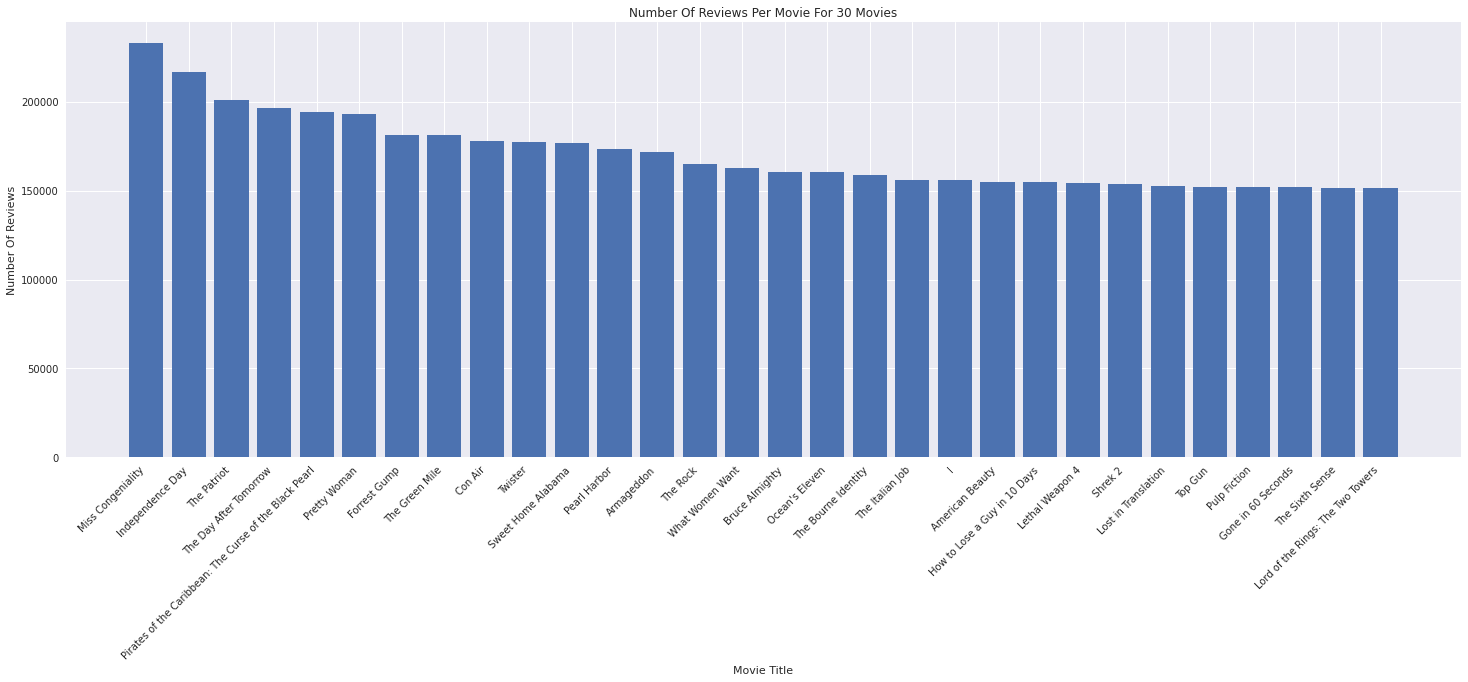

In [15]:
if len(most_reviews_per_movie)>=n_top: 
    x_values = range(n_top)
    x_labels = most_reviews_per_movie_top['Title']
    y_values = most_reviews_per_movie_top['UserID'].values

    with plt.style.context('seaborn'):
        fig, ax = plt.subplots(figsize = (25,8))
        plt.bar(x_values, y_values)
        plt.xticks(x_values,x_labels, rotation=45, ha = 'right')
        plt.xlabel('movie title'.title())
        plt.ylabel('number of reviews'.title())
        plt.title(f'number of reviews per movie for {n_top} movies'.title())
        plt.show()

# Number of reviews per user 

In [16]:
reviews_per_user = mv.groupby('UserID').count().sort_values('MovieID', ascending = False)[['MovieID']]


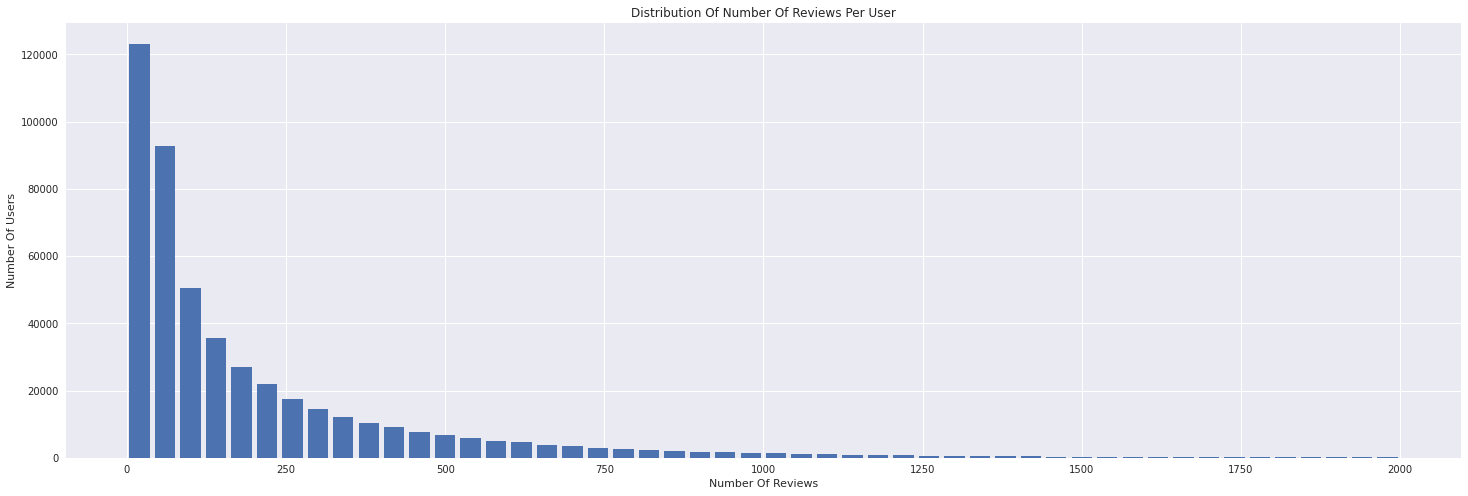

In [17]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize = (25,8))
    plt.hist(reviews_per_user, bins = 50, range=[0,2000],rwidth = 0.8)
    plt.xlabel('number of reviews'.title())
    plt.ylabel('number of users'.title())
    plt.title('distribution of number of reviews per user'.title())
    plt.show()

# Rating Distribution

In [18]:
rating_distribution = mv.groupby('Rating').count().sort_values('MovieID', ascending = False)[['MovieID']].rename(columns = {'MovieID' :'Count'})
rating_distribution = rating_distribution.sort_index()
rating_distribution

,Count
Rating,
1,4617990
2,10132080
3,28811247
4,33750958
5,23168232


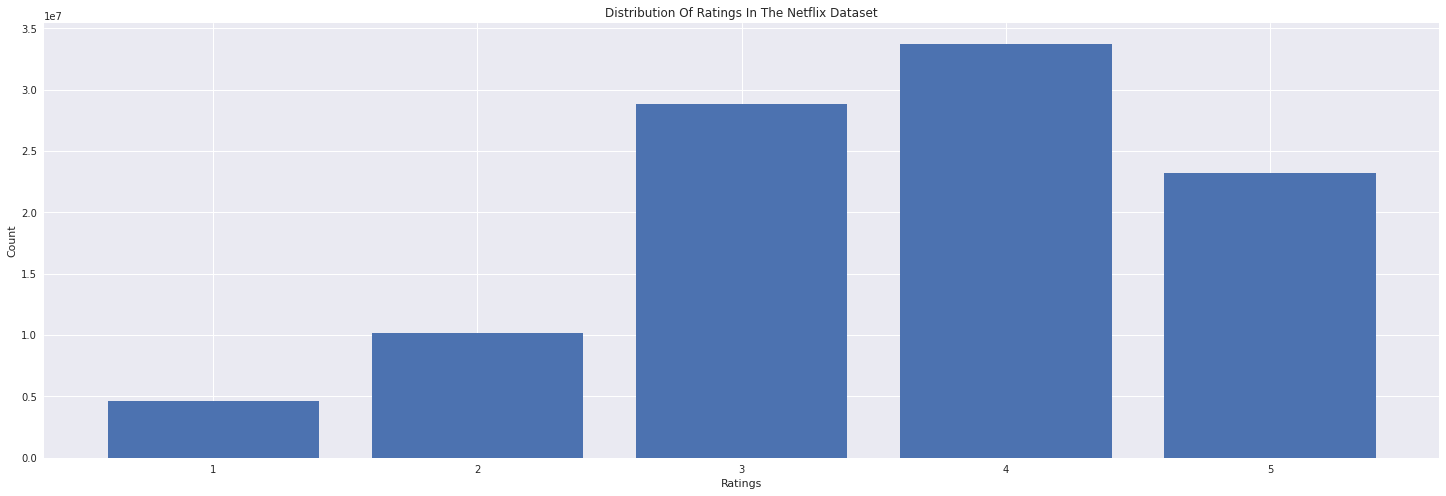

In [19]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize = (25,8))
    plt.bar(rating_distribution.index, rating_distribution['Count'])
    plt.xlabel('ratings'.title())
    plt.ylabel('count'.title())
    plt.title('distribution of ratings in the netflix dataset'.title())
    plt.show()

# Create subset 

In [20]:
#Top N movies which have the most reviews
movies_with_most_reviews = most_reviews_per_movie[:N_MAX_MOVIES_SUBSET ]

#Top N users which have the most reviews
users_with_most_reviews = reviews_per_user[:N_MAX_USERS_SUBSET]


In [21]:
#Subset
mask_ss = (mv['MovieID'].isin(list(movies_with_most_reviews.index))) & (mv['UserID'].isin(list(users_with_most_reviews.index)))
mv_ss = mv.loc[mask_ss]

if DEBUG != True:
    mv_ss.to_csv('movies_subset.csv.gz',index = False, compression='gzip')

In [22]:
mv_ss

,MovieID,UserID,Rating,RatingDate
448277,9340,1907667,3,2001-08-02
448292,9340,306466,4,2001-12-25
448340,9340,1109700,1,2001-06-29
448466,9340,1744889,1,2002-09-12
448516,9340,1174530,3,2003-01-16
...,...,...,...,...
25489569,8904,2341389,4,2000-10-06
25489635,8904,70476,5,2002-06-29
25489650,8904,1561134,4,2002-08-06
25489780,8904,2513621,5,2004-02-24


In [23]:
mv_ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205303 entries, 448277 to 25489786
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   MovieID     205303 non-null  int64         
 1   UserID      205303 non-null  int64         
 2   Rating      205303 non-null  int64         
 3   RatingDate  205303 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.8 MB


In [24]:
mv_ss_200 = mv[mv['MovieID'].isin(list(movies_with_most_reviews.index))]

In [25]:
mv_ss_200.head()

,MovieID,UserID,Rating,RatingDate
448261,9340,2354291,5,2005-07-05
448262,9340,2619271,5,2005-07-05
448263,9340,1026389,3,2005-07-06
448264,9340,364518,2,2002-07-24
448265,9340,1400980,1,2005-07-07


In [26]:
users_with_most_reviews_200 = mv_ss_200.groupby('UserID').count().rename(columns = {'MovieID':'n_reviews'}).sort_values('n_reviews', ascending = False)[['n_reviews']]
users_with_most_reviews_200 = users_with_most_reviews_200[users_with_most_reviews_200['n_reviews']>10]
users_with_most_reviews_200.head() 

,n_reviews
UserID,
2118461,200
1122364,200
387418,200
467182,200
732363,200


In [27]:
pd.set_option('display.max_rows', None)
mv_ss_200_r_dist = mv_ss_200.groupby(['MovieID', 'Rating']).count().rename(columns = {'UserID' : 'n_ratings'})[['n_ratings']].reset_index()

In [28]:
mv_ss_200_r_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MovieID    1000 non-null   int64
 1   Rating     1000 non-null   int64
 2   n_ratings  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [29]:
mv_ss_200.loc[(mv_ss_200['MovieID']==30) & (mv_ss_200['Rating']==1)].sample(250, random_state = 3).head()

,MovieID,UserID,Rating,RatingDate
181213,30,1366162,1,2005-10-26
155042,30,483101,1,2005-07-07
172084,30,2148796,1,2004-11-20
206935,30,998271,1,2004-06-21
174101,30,607621,1,2005-06-07


In [30]:
def make_balance_dataset(row):
    df_users_who_rated_movie = mv_ss_200.loc[(mv_ss_200['MovieID']==row['MovieID']) & (mv_ss_200['Rating']==row['Rating'])]
    df = users_with_most_reviews_200.merge(df_users_who_rated_movie, left_on = 'UserID', right_on = 'UserID')
    df
    if len(df)<250:
        return df
    else:
        return df[:250]


In [31]:
mv_ss_200_r_dist['dfs_by_users_movieid_rating'] = mv_ss_200_r_dist.apply(make_balance_dataset,axis = 1) 

In [32]:
mv_ss_bal = mv_ss_200_r_dist.iloc[0]['dfs_by_users_movieid_rating']

for index, row in mv_ss_200_r_dist.iterrows():
    if index != 0:
        mv_ss_bal = pd.concat([mv_ss_bal, row['dfs_by_users_movieid_rating']])

In [33]:
mv_ss_bal.groupby('UserID').count().head()

,n_reviews,MovieID,Rating,RatingDate
UserID,,,,
79,3,3,3,3
97,1,1,1,1
437,1,1,1,1
614,1,1,1,1
1333,106,106,106,106


In [34]:
if DEBUG == False:
    mv_ss_bal.to_csv('movies_subset_balanced.csv.gz',index = False, compression='gzip')
